##**1. Import Library**

In [1]:
# install rpy2 with 3.4.2 version for hypotesis testing purposes
!pip install -Iv rpy2==3.4.2

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.1/186.1 kB 3.4 MB/s eta 0:00:00
  Running command python setup.py egg_info
  /usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!

          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************

  !!
    dist.fetch_build_eggs(dist.setup_requires)
  ['cffi>=1.10.0', 'jinja2', 'pytz', 'tzlocal']
  running egg_info
  creating /tmp/pip-pip-egg-info-n1jm51sv/rpy2.egg-info
  writing /tmp/pip-pip-egg-info-n1jm51sv/rpy2.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-n1jm51sv/rpy2.egg-info/depen

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**2. Load Dataset**

In [2]:
# load dataset from google drive storage
df = pd.read_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/Student Adaptivity in Online Learning/clean_dataset.csv')
df

,gender,age,education_level,institution_type,it_student,location,load_shedding,financial_condition,internet_type,class_duration,self_lms,device,adaptivity_level
0,Male,21-25,University,Non Government,No,Yes,Low,Middle Class,Wifi,3-6,No,Tab,Moderate
1,Female,21-25,University,Non Government,No,Yes,High,Middle Class,Mobile Data,1-3,Yes,Mobile,Moderate
2,Female,16-20,College,Government,No,Yes,Low,Middle Class,Wifi,1-3,No,Mobile,Moderate
3,Female,11-15,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,1-3,No,Mobile,Moderate
4,Female,16-20,School,Non Government,No,Yes,Low,Lower Class,Mobile Data,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Male,21-25,University,Non Government,Yes,No,High,Middle Class,Mobile Data,3-6,No,Computer,Low
252,Male,16-20,College,Government,No,Yes,Low,Middle Class,Mobile Data,1-3,No,Mobile,Moderate
253,Female,16-20,College,Non Government,No,No,Low,Middle Class,Mobile Data,1-3,Yes,Mobile,Low
254,Male,21-25,University,Non Government,Yes,No,High,Middle Class,Mobile Data,1-3,Yes,Mobile,Moderate


In [ ]:
df.columns

Index(['gender', 'age', 'education_level', 'institution_type', 'it_student',
       'location', 'load_shedding', 'financial_condition', 'internet_type',
       'class_duration', 'self_lms', 'device', 'adaptivity_level'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               256 non-null    object
 1   age                  256 non-null    object
 2   education_level      256 non-null    object
 3   institution_type     256 non-null    object
 4   it_student           256 non-null    object
 5   location             256 non-null    object
 6   load_shedding        256 non-null    object
 7   financial_condition  256 non-null    object
 8   internet_type        256 non-null    object
 9   class_duration       256 non-null    object
 10  self_lms             256 non-null    object
 11  device               256 non-null    object
 12  adaptivity_level     256 non-null    object
dtypes: object(13)
memory usage: 26.1+ KB


In [ ]:
df.duplicated().sum()

15

##**3. Exploratory Data Analysis (EDA)**

###**a. Statistical Summary**

In [ ]:
# list the columns in the same data type
cat_var = [col for col in df.columns if (df[col].dtype=='O') and (col != 'adaptivity_level')]
num_var = [col for col in df.columns if (df[col].dtype=='int64') | (df[col].dtype=='float64') ]

In [ ]:
# check categorical variable
cat_var

['gender',
 'age',
 'education_level',
 'institution_type',
 'it_student',
 'location',
 'load_shedding',
 'financial_condition',
 'internet_type',
 'class_duration',
 'self_lms',
 'device']

In [ ]:
# check descriptive statistics of categorical variables
df[cat_var].describe().T

,count,unique,top,freq
gender,256,2,Male,148
age,256,6,21-25,101
education_level,256,3,University,121
institution_type,256,2,Non Government,152
it_student,256,2,No,178
location,256,2,Yes,182
load_shedding,256,2,Low,202
financial_condition,256,3,Middle Class,183
internet_type,256,2,Mobile Data,138
class_duration,256,3,1-3,163


###**b. Univariate Analysis**

####**Gender**

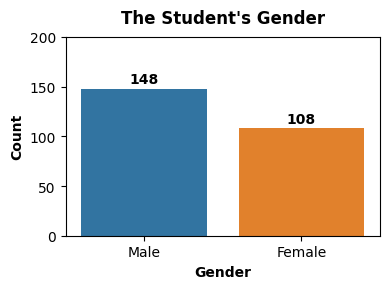

In [ ]:
# visualize each variable (gender) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='gender',
                  order= df.gender.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,200)
ax.set_title("The Student's Gender", weight='bold',pad= 10)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Gender', weight='bold')
plt.tight_layout()
plt.show()

> - The number of male students (148 people) is **greater** than that of female students (108 people).


####**Age**

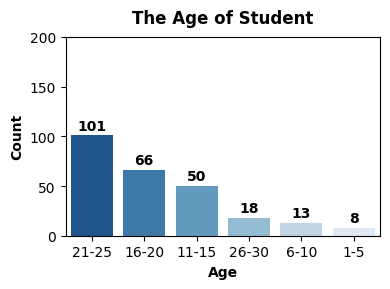

In [ ]:
# # visualize each variable (age) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='age',
                  palette="Blues_r",
                  order= df.age.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,200)
ax.set_title("The Age of Student", weight='bold',pad= 10)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Age', weight='bold')
plt.tight_layout()
plt.show()

> - The number of students aged 21-25 years (101 people) is **the highest** compared to students with other age ranges.
>
> - Students aged 1-5 years (8 people) are **the lowest**.

####**Education Level**

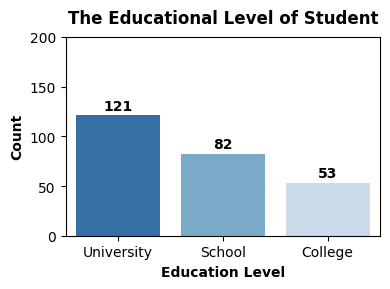

In [ ]:
# # visualize each variable (education level) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='education_level',
                  palette="Blues_r",
                  order= df.education_level.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,200)
ax.set_title("The Educational Level of Student", weight='bold',pad= 10)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Education Level', weight='bold')
plt.tight_layout()
plt.show()

> - Students with educational levels at the university level (121 people) have **the highest** number compared to students with other educational levels.
>
> - Students with an education level at the college level (53 people) have **the lowest** number.

####**Institution Type**


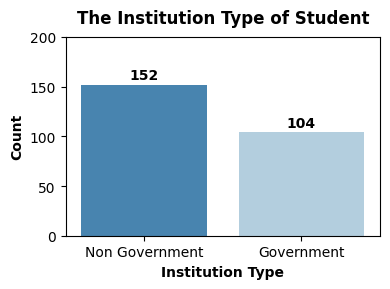

In [ ]:
# # visualize each variable (institution type) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='institution_type',
                  palette="Blues_r",
                  order= df.institution_type.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,200)
ax.set_title("The Institution Type of Student", weight='bold',pad= 10)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Institution Type', weight='bold')
plt.tight_layout()
plt.show()

> - Students with a type of education is non-government (152 people) are **the largest** in number, compared to students with a type of government education (104 people).

####**IT Student**

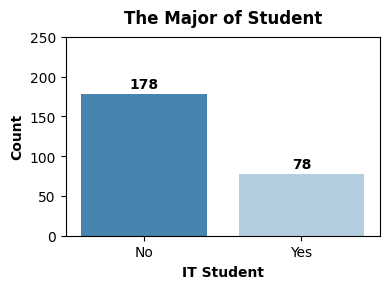

In [ ]:
# # visualize each variable (IT student) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='it_student',
                  palette="Blues_r",
                  order= df.it_student.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,250)
ax.set_title("The Major of Student", weight='bold',pad= 10)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('IT Student', weight='bold')
plt.tight_layout()
plt.show()

> - Students with IT majors (178 people) have **the largest** number, compared to students with non-IT majors (78 people).

####**Location**

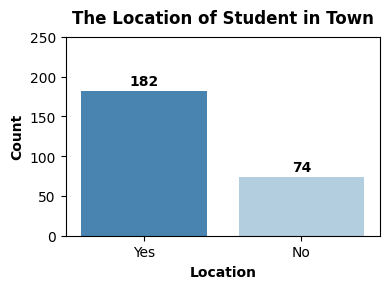

In [ ]:
# # visualize each variable (location) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='location',
                  palette="Blues_r",
                  order= df.location.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,250)
ax.set_title("The Location of Student in Town", weight='bold',pad= 10)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Location', weight='bold')
plt.tight_layout()
plt.show()

> - Students located in cities/town (Yes) (182 people) have **the largest** number compared to students located in rural area (No) (74 people).

####**Load Shedding**

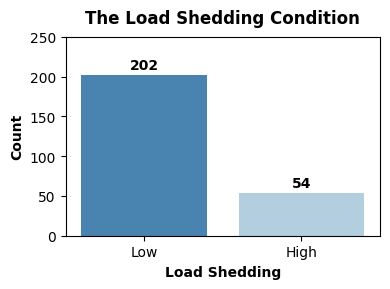

In [ ]:
# # visualize each variable (load shedding) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='load_shedding',
                  palette="Blues_r",
                  order= df.load_shedding.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,250)
ax.set_title("The Load Shedding Condition", weight='bold',pad= 10)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Load Shedding', weight='bold')
plt.tight_layout()
plt.show()

> - Most students experience load shedding with low conditions.

####**Financial Condition**

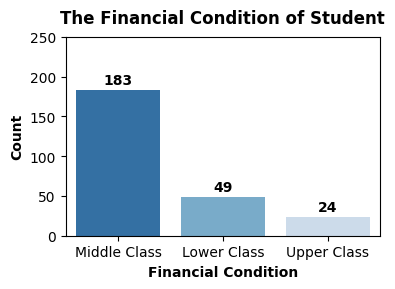

In [ ]:
# # visualize each variable (financial condition) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='financial_condition',
                  palette="Blues_r",
                  order= df.financial_condition.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,250)
ax.set_title("The Financial Condition of Student", weight='bold',pad= 10)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Financial Condition', weight='bold')
plt.tight_layout()
plt.show()

> - Students with financial conditions, namely Middle Class (183 people) , are **the largest** in number compared to students with other financial conditions.
>
> - Students with financial conditions, namely the Upper Class (24 people), are **the smallest** in number.


####**Internet Type**

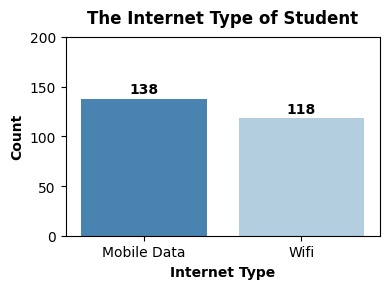

In [ ]:
# # visualize each variable (internet type) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='internet_type',
                  palette="Blues_r",
                  order= df.internet_type.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,200)
ax.set_title("The Internet Type of Student", weight='bold',pad= 10)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Internet Type', weight='bold')
plt.tight_layout()
plt.show()

> - Students with the internet type, namely Mobile Data (138 people), are **the largest** in number compared to students with other types of internet.
>
> - Students with internet type, namely Wifi (118 people) were **the smallest** in number.

####**Class Duration**

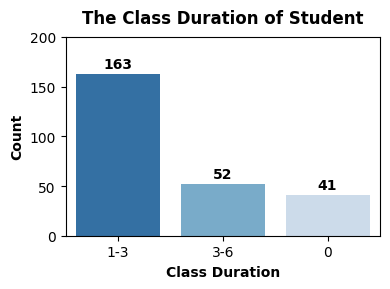

In [ ]:
# # visualize each variable (class duration) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='class_duration',
                  palette="Blues_r",
                  order= df.class_duration.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,200)
ax.set_title("The Class Duration of Student", weight='bold',pad= 10)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Class Duration', weight='bold')
plt.tight_layout()
plt.show()

> - Students with class durations of 1-3 hours (163 people) are **the largest** in number compared to students with other class durations.
>
> - Students with class duration of 0 or less than 1 hour (41 people) were **the smallest** in number.

####**Self LMS**

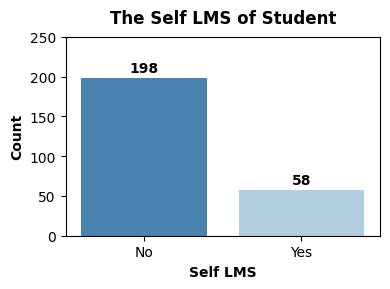

In [ ]:
# # visualize each variable (self lms) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='self_lms',
                  palette="Blues_r",
                  order= df.self_lms.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,250)
ax.set_title("The Self LMS of Student", weight='bold',pad= 10)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Self LMS', weight='bold')
plt.tight_layout()
plt.show()

> - Students who don't have a Learning Management System (LMS) or self-lms = "No" (198 people) are **the smallest** in number compared to students who have LMS (58 people).

####**Device**

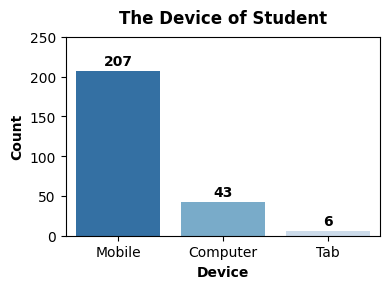

In [ ]:
# # visualize each variable (self lms) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df,
                  x='device',
                  palette="Blues_r",
                  order= df.device.value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,250)
ax.set_title("The Device of Student", weight='bold',pad= 10)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Device', weight='bold')
plt.tight_layout()
plt.show()

> - Students with mobile devices (207 people) are **the largest** in number compared to students using other devices
>
> - Students with Tab devices(6 people) are **the smallest** in number.

####**Adaptivity Level**

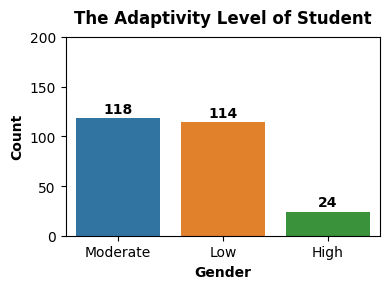

In [ ]:
# visualize each variable (adaptivity level) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df, x='adaptivity_level', order= df['adaptivity_level'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,200)
ax.set_title("The Adaptivity Level of Student", weight='bold',pad= 10)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Gender', weight='bold')
plt.tight_layout()
plt.show()

> - Students with an adaptation level, namely Moderate (118 people), are **the largest** in number compared to students with other adaptation levels.
>
> - Students with an adaptation level of High (24 people) are **the smallest** in number.
>
> - Students with adaptation levels namely Moderate (118 people) and Low (114 people) in point comparison, the difference is not that big, only **4 points** difference.

###**c. Deep-Dive Questions**

####**1c. How is The Adaptability of Students in Online Learning?**

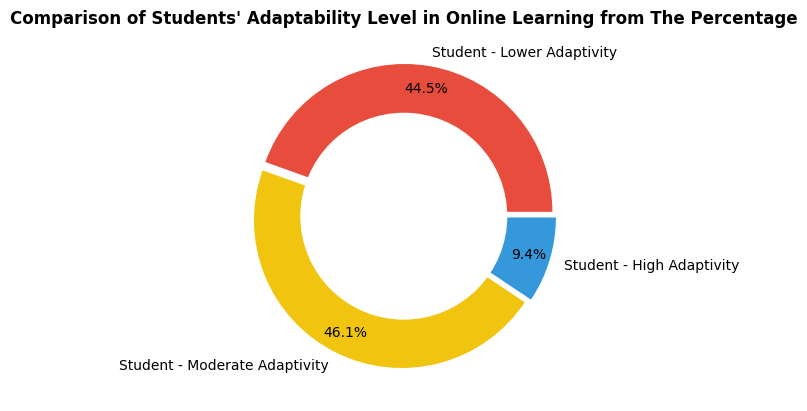

In [ ]:
# # counts the number of students who get a math score greater than equal to the specified cutoff

lo_adapt = df[df['adaptivity_level']=='Low'].shape[0]
mod_adapt = df[df['adaptivity_level']=='Moderate'].shape[0]
hi_adapt = df[df['adaptivity_level']=='High'].shape[0]

labels = ['Student - Lower Adaptivity',
          'Student - Moderate Adaptivity',
          'Student - High Adaptivity']
sizes = [lo_adapt,
         mod_adapt,
         hi_adapt]
colors = ['#E74C3C','#F1C40F','#3498DB']
explode = (0.03, 0.03, 0.03)

# Pie Chart
plt.pie(sizes,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        pctdistance=0.85,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title("Comparison of Students' Adaptability Level in Online Learning from The Percentage", weight='bold')

# Displaying Chart
plt.show()

>  - As can be seen from the donut diagram above, the percentage of students with a high level of adaptation can be said to be **small/low**, namely only **9.4%**. Meanwhile, the percentage of students with low (44.5%) and moderate (46.1%) levels of adaptation shows a small difference in percentage.

####**2c. How is The Adaptability of Students Based on Age?**

In [ ]:
gndr_tpc = df[df['adaptivity_level']=='High'].groupby(['age','gender']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['age'], columns=['gender'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['age'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
age,,,,
6-10,3,1,4,31.0
26-30,0,3,3,17.0
11-15,1,5,6,12.0
21-25,2,7,9,9.0
16-20,2,0,2,3.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Moderate'].groupby(['age','gender']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['age'], columns=['gender'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['age'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
age,,,,
1-5,4,0,4,50.0
11-15,10,15,25,50.0
21-25,16,33,49,49.0
16-20,16,15,31,47.0
26-30,0,7,7,39.0
6-10,1,1,2,15.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Low'].groupby(['age','gender']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['age'], columns=['gender'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['age'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
age,,,,
6-10,3,4,7,54.0
1-5,1,3,4,50.0
16-20,21,12,33,50.0
26-30,6,2,8,44.0
21-25,14,29,43,43.0
11-15,8,11,19,38.0


>  - Students aged 6-10 years have the highest percentage based on the level of adaptation in the high category, compared to students from other age ranges. At the same time the highest percentage with a low level of adaptation.
>
> - Students aged 1-5 years do not have a high level of adaptation.

####**3c. How is The Adaptability of Students Based on Education Level?**

In [ ]:
gndr_tpc = df[df['adaptivity_level']=='High'].groupby(['education_level','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['education_level'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['education_level'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,High,High,,
education_level,,,,
School,5,6,11,13.0
University,2,10,12,10.0
College,1,0,1,2.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Moderate'].groupby(['education_level','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['education_level'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['education_level'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,Moderate,Moderate,,
education_level,,,,
University,19,41,60,50.0
College,13,11,24,45.0
School,15,19,34,41.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Low'].groupby(['education_level','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['education_level'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['education_level'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,Low,Low,,
education_level,,,,
College,14,14,28,53.0
School,18,19,37,45.0
University,21,28,49,40.0


> - students with an education level, namely School, have the highest percentage based on a high level of adaptation in online learning, compared to students with other educational levels.
>
> - Students with an education level, namely College, have the highest percentage based on a low level of adaptation in online learning, compared to students with other educational levels.
>
> - Students with a university education level have the highest percentage based on a moderate level of adaptation in online learning, compared to students with other educational levels.

####**4c. How is The Adaptability of Students Based on Institution Type?**

In [ ]:
gndr_tpc = df[df['adaptivity_level']=='High'].groupby(['institution_type','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['institution_type'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['institution_type'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,High,High,,
institution_type,,,,
Non Government,7,12,19,12.0
Government,1,4,5,5.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Moderate'].groupby(['institution_type','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['institution_type'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['institution_type'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,Moderate,Moderate,,
institution_type,,,,
Non Government,40,45,85,56.0
Government,7,26,33,32.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Low'].groupby(['institution_type','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['institution_type'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['institution_type'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,Low,Low,,
institution_type,,,,
Government,30,36,66,63.0
Non Government,23,25,48,32.0


> - Students with the type of educational institution, namely Non-Government, have the highest percentage based on a high level of adaptation in online learning, compared to students with other type of educational institution.
>
> - Students with the type of educational institution, namely Government, have the highest percentage based on their low level of adaptation in online learning, compared to students with other type of educational institution.
>
> - Students with the type of educational institution, namely Non-Government, have the highest percentage based on a moderate level of adaptation in online learning, compared to students with other type of educational institution.

####**5c. How is The Adaptability of Students Based on IT Student?**

In [ ]:
gndr_tpc = df[df['adaptivity_level']=='High'].groupby(['it_student','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['it_student'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['it_student'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,High,High,,
it_student,,,,
No,7,10,17,10.0
Yes,1,6,7,9.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Moderate'].groupby(['it_student','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['it_student'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['it_student'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,Moderate,Moderate,,
it_student,,,,
Yes,13,32,45,58.0
No,34,39,73,41.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Low'].groupby(['it_student','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['it_student'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['it_student'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,Low,Low,,
it_student,,,,
No,47,41,88,49.0
Yes,6,20,26,33.0


> - Students with education majors, namely Non-IT, have the highest percentage based on their high level of adaptation in online learning, compared to students with other educational levels. At the same time, it has the highest percentage based on a low level of adaptation in online learning.
>
> - Students with education majors, namely IT, have the highest percentage based on a moderate level of adaptation in online learning, compared to students with other levels of education.

####**6c. How is The Adaptability of Students Based on Location?**

In [ ]:
gndr_tpc = df[df['adaptivity_level']=='High'].groupby(['location','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['location'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['location'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,High,High,,
location,,,,
Yes,7,14,21,12.0
No,1,2,3,4.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Moderate'].groupby(['location','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['location'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['location'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,Moderate,Moderate,,
location,,,,
Yes,38,54,92,51.0
No,9,17,26,35.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Low'].groupby(['location','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['location'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['location'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,Low,Low,,
location,,,,
No,22,23,45,61.0
Yes,31,38,69,38.0


> - Students who are located in cities (Yes) , have the highest percentage of adaptation levels in the high category.
>
> - Students who are located in villages (No), have the highest percentage of adaptation levels in the low category.
>
> - Students who are located in cities (Yes), also have the highest percentage of adaptation levels in the moderate category.

####**7c. How is The Adaptability of Students Based on Load Shedding?**

In [ ]:
gndr_tpc = df[df['adaptivity_level']=='High'].groupby(['load_shedding','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['load_shedding'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['load_shedding'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,High,High,,
load_shedding,,,,
Low,8,14,22,11.0
High,0,2,2,4.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Moderate'].groupby(['load_shedding','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['load_shedding'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['load_shedding'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,Moderate,Moderate,,
load_shedding,,,,
High,9,16,25,46.0
Low,38,55,93,46.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Low'].groupby(['load_shedding','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['load_shedding'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['load_shedding'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,Low,Low,,
load_shedding,,,,
High,12,15,27,50.0
Low,41,46,87,43.0


> - Students with low load shedding have the highest percentage for the level of adaptation in the high category.
>
> - Students with high load shedding have the highest percentage for adaptation levels in the low and also moderate categories.

####**8c. How The Adaptability of Students Based on Financial Conditions?**

In [ ]:
gndr_tpc = df[df['adaptivity_level']=='High'].groupby(['financial_condition','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['financial_condition'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['financial_condition'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,High,High,,
financial_condition,,,,
Upper Class,4,9,13,54.0
Lower Class,1,2,3,6.0
Middle Class,3,5,8,4.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Moderate'].groupby(['financial_condition','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['financial_condition'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['financial_condition'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,Moderate,Moderate,,
financial_condition,,,,
Middle Class,37,55,92,50.0
Lower Class,6,13,19,39.0
Upper Class,4,3,7,29.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Low'].groupby(['financial_condition','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['financial_condition'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['financial_condition'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,Low,Low,,
financial_condition,,,,
Lower Class,11,16,27,55.0
Middle Class,40,43,83,45.0
Upper Class,2,2,4,17.0


> - Students with financial conditions, namely the Upper Class, have the highest percentage based on their high level of adaptation in online learning, compared to students with other educational levels.
>
> - Students with financial conditions, namely Lower Class, have the highest percentage based on their low level of adaptation in online learning, compared to students with other educational levels.
>
> - Students with financial conditions, namely Middle Class, have the highest percentage based on their moderate level of adaptation in online learning, compared to students with other educational levels.

####**9c. How The Adaptability of Students Based on Internet Type?**

In [ ]:
gndr_tpc = df[df['adaptivity_level']=='High'].groupby(['internet_type','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['internet_type'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['internet_type'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,High,High,,
internet_type,,,,
Wifi,6,10,16,14.0
Mobile Data,2,6,8,6.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Moderate'].groupby(['internet_type','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['internet_type'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['internet_type'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,Moderate,Moderate,,
internet_type,,,,
Wifi,26,32,58,49.0
Mobile Data,21,39,60,43.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Low'].groupby(['internet_type','gender','adaptivity_level']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['internet_type'], columns=['gender','adaptivity_level'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['internet_type'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
adaptivity_level,Low,Low,,
internet_type,,,,
Mobile Data,31,39,70,51.0
Wifi,22,22,44,37.0


> - Students with internet type, namely Wifi, have the highest percentage based on their high level of adaptation in online learning, compared to students with other internet types. At the same time, it has the highest percentage based on a moderate level of adaptation in online learning.
>
> - Students with the internet type, namely Mobile Data, have the highest percentage based on their low adaptation level in online learning.

####**10c. How is The Adaptability of Students Based on Class Duration?**

In [ ]:
gndr_tpc = df[df['adaptivity_level']=='High'].groupby(['class_duration','gender']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['class_duration'], columns=['gender'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['class_duration'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
class_duration,,,,
3-6,2,4,6,12.0
1-3,6,12,18,11.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Moderate'].groupby(['class_duration','gender']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['class_duration'], columns=['gender'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['class_duration'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
class_duration,,,,
3-6,15,17,32,62.0
1-3,32,51,83,51.0
0,0,3,3,7.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Low'].groupby(['class_duration','gender']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['class_duration'], columns=['gender'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['class_duration'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
class_duration,,,,
0,19,19,38,93.0
1-3,29,33,62,38.0
3-6,5,9,14,27.0


> - Students with class duration of 3-6 hours have the highest percentage seen based on a high level of adaptation in online learning, compared to students with other class durations. At the same time, it has the highest percentage based on a moderate level of adaptation in online learning.
>
> - Students with class duration, which is less than an hour / 0 hours, have the highest percentage based on their low adaptation level in online learning.

####**11c. How is The Adaptability of Students Based on Self LMS?**

In [ ]:
gndr_tpc = df[df['adaptivity_level']=='High'].groupby(['self_lms','gender']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['self_lms'], columns=['gender'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['self_lms'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
self_lms,,,,
Yes,1,5,6,10.0
No,7,11,18,9.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Moderate'].groupby(['self_lms','gender']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['self_lms'], columns=['gender'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['self_lms'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
self_lms,,,,
Yes,11,23,34,59.0
No,36,48,84,42.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Low'].groupby(['self_lms','gender']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['self_lms'], columns=['gender'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['self_lms'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
self_lms,,,,
No,45,51,96,48.0
Yes,8,10,18,31.0


> - Students who have their own LMS, have the highest percentage for the level of adaptation with a high category in online learning. At the same time, it has the highest percentage based on a moderate level of adaptation in online learning.
>
> - Students who don't have their own LMS, have the highest percentage of adaptation levels in the low category in online learning.

####**12c. How is The Adaptability of Students Based on Device?**

In [ ]:
gndr_tpc = df[df['adaptivity_level']=='High'].groupby(['device','gender']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['device'], columns=['gender'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['device'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
device,,,,
Tab,0,1,1,17.0
Computer,1,5,6,14.0
Mobile,7,10,17,8.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Moderate'].groupby(['device','gender']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['device'], columns=['gender'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['device'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
device,,,,
Tab,2,2,4,67.0
Computer,9,16,25,58.0
Mobile,36,53,89,43.0


In [ ]:
gndr_tpc = df[df['adaptivity_level']=='Low'].groupby(['device','gender']).size().reset_index(name='total_students')
gndr_tpc = gndr_tpc.pivot_table(index=['device'], columns=['gender'], values='total_students', fill_value=0)
gndr_tpc['total_students'] = gndr_tpc.sum(axis=1)
gndr_tpc['pct'] = round(gndr_tpc['total_students'] / df['device'].value_counts() * 100,0)
gndr_tpc = gndr_tpc.sort_values(by=['pct'], ascending=False)
gndr_tpc

gender,Female,Male,total_students,pct
device,,,,
Mobile,49,52,101,49.0
Computer,3,9,12,28.0
Tab,1,0,1,17.0


> - Students who use tabs have the highest percentage of adaptation levels with high categories in online learning. At the same time, it has the highest percentage based on a moderate level of adaptation in online learning.
>
> - Students who use mobile have the highest percentage of adaptation levels in the low category in online learning.

##**4. Hypothesis Testing**

###**a. Spearman Rank Test**

In [3]:
from scipy.stats import spearmanr

# Define a function to determine if H0 is rejected or not based on the p-value
def reject_h0(p_value, alpha=0.05):
    if p_value < alpha:
        return 'Yes'
    else:
        return 'No'

# Define a mapping for ordinal variables
education_level_mapping = {'School': 1, 'College': 2, 'University': 3}
financial_condition_mapping = {'Lower Class': 1, 'Middle Class': 2, 'Upper Class': 3}
adaptivity_level_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}

# Copy dataframe
df_h = df.copy()

# Apply the mapping to the dataset
df_h['education_level_ord'] = df_h['education_level'].map(education_level_mapping)
df_h['financial_condition_ord'] = df_h['financial_condition'].map(financial_condition_mapping)
df_h['adaptivity_level_ord'] = df_h['adaptivity_level'].map(adaptivity_level_mapping)

# Perform the Spearman rank correlation for each ordinal variable
spearman_results = []
for column in ['education_level_ord', 'financial_condition_ord']:
    # Perform the Spearman rank correlation
    spearman_result = stats.spearmanr(df_h[column], df_h['adaptivity_level_ord'])
    spearman_results.append((column, spearman_result.correlation, spearman_result.pvalue))

# Convert the results to a DataFrame and calculate whether to reject H0
spearman_df_h = pd.DataFrame(spearman_results, columns=['Variable', 'Correlation', 'p-value'])
spearman_df_h['Reject H0'] = spearman_df_h['p-value'].apply(reject_h0)

spearman_df_h


,Variable,Correlation,p-value,Reject H0
0,education_level_ord,0.035437,0.572491,No
1,financial_condition_ord,0.242580,0.000088,Yes


###**b. Choose The Appropriate Test**

In [4]:
# List of features
features = ['gender', 'age', 'institution_type', 'it_student', 'location',
            'load_shedding', 'internet_type', 'class_duration',
            'self_lms', 'device']

# Output dataframe
output = pd.DataFrame(columns=['variable', 'expected_frequency', 'test'])

# Iterate over each feature
for feature in features:
    # Create contingency table
    contingency_table = pd.crosstab(df[feature], df['adaptivity_level'])
    # Check for expected frequency
    expected_frequency = chi2_contingency(contingency_table).expected_freq
    if np.all(expected_frequency >= 5):
        # All cells have expected frequency >= 5
        output = output.append({'variable': feature,
                                'expected_frequency': '>= 5',
                                'test': 'chi-square'}, ignore_index=True)
    else:
        # At least one cell has expected frequency < 5
        output = output.append({'variable': feature,
                                'expected_frequency': '< 5',
                                'test': "fisher's exact"}, ignore_index=True)

output



,variable,expected_frequency,test
0,gender,>= 5,chi-square
1,age,< 5,fisher's exact
2,institution_type,>= 5,chi-square
3,it_student,>= 5,chi-square
4,location,>= 5,chi-square
5,load_shedding,>= 5,chi-square
6,internet_type,>= 5,chi-square
7,class_duration,< 5,fisher's exact
8,self_lms,>= 5,chi-square
9,device,< 5,fisher's exact


###**c. Chi-Square of Independence Test**

In [6]:
import pandas as pd
from scipy.stats import chi2_contingency

# Define features and the label
features = ['gender','institution_type', 'it_student', 'location', 'load_shedding', 'financial_condition', 'internet_type', 'self_lms']
label = 'adaptivity_level'

# Create an empty dataframe to store the results
results = pd.DataFrame(columns=['variable', 'test', 'p-value', 'reject H0', 'Cramér\'s V'])

# Function to compute Cramér's V
def cramers_v(contingency_table, chi2):
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Perform chi-square test for each feature against the label
for feature in features:
    contingency_table = pd.crosstab(df[feature], df[label])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    reject_H0 = 'Yes' if p < 0.05 else 'No'

    # Calculate Cramér's V
    v = cramers_v(contingency_table, chi2)

    results = results.append({'variable': feature, 'test': 'chi-square', 'p-value': p, 'reject H0': reject_H0, 'Cramér\'s V': v}, ignore_index=True)

results


,variable,test,p-value,reject H0,Cramér's V
0,gender,chi-square,3.855906e-01,No,0.000000
1,institution_type,chi-square,2.458167e-06,Yes,0.305664
2,it_student,chi-square,3.971535e-02,Yes,0.132017
3,location,chi-square,2.417512e-03,Yes,0.198448
4,load_shedding,chi-square,2.455999e-01,No,0.056021
5,financial_condition,chi-square,2.576376e-13,Yes,0.346477
6,internet_type,chi-square,2.856290e-02,Yes,0.141470
7,self_lms,chi-square,5.796520e-02,No,0.120262


###**d. Fisher's Exact Test**

In [7]:
# define features and the label
features = ['age', 'class_duration', 'device']
label = 'adaptivity_level'

# create an empty dataframe to store the results
results = pd.DataFrame(columns=['variable', 'test', 'p-value', 'reject H0'])

# Function to compute Cramér's V
def cramers_v(contingency_table, chi2):
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# perform fisher's exact test for each feature against the label
for feature in features:
    contingency_table = pd.crosstab(df[feature], df[label])
    stats = importr('stats')
    base = importr('base')
    contingency_tab = contingency_table.values
    r_data = rpy2.robjects.r.matrix(base.unlist(contingency_tab), nrow= contingency_tab.shape[0], byrow=True)
    res = stats.fisher_test(r_data, simulate_p_value = True)
    reject_H0 = 'Yes' if res[0][0] < 0.05 else 'No'
    results = results.append({'variable': feature, 'test': "fisher's exact", 'p-value': res[0][0], 'reject H0': reject_H0}, ignore_index=True)

results

,variable,test,p-value,reject H0
0,age,fisher's exact,0.000500,Yes
1,class_duration,fisher's exact,0.000500,Yes
2,device,fisher's exact,0.042479,Yes


##**5. Conclusion**

##**In English**

**Student Demographics Data:**

- There are more male students (148 individuals) than females (108 individuals).

- The age group with the highest number of students is 21-25 years old (101 individuals), while those aged 1-5 years old have the lowest count (8 individuals).

- Most of the data comes from students enrolled in Universities (121 individuals), with the least coming from those in Colleges (53 individuals).

- The majority of students attend private or non-governmental institutions (152 individuals), while the rest study at government-owned institutions (104 individuals).

- Most students are not from an IT background (178 individuals), while the rest are in IT or have chosen IT as their major (78 individuals).

- Students living in cities (location = Yes) are more numerous (182 individuals) compared to those not living in cities (location = No) which counts 74 individuals.

- Students reporting low category load shedding are predominant (202 individuals), compared to those experiencing high category load shedding (54 individuals).

- The majority of students come from middle-class financial backgrounds (183 individuals). Meanwhile, students from upper-class financial backgrounds are the least (24 individuals) compared to other financial backgrounds.

- Most students use Mobile data as their internet type (138 individuals), and the rest use Wifi (118 individuals).

- Most students have class durations of 1-3 hours (163 individuals). Those with class durations of less than 1 hour or 0 hours are the least (41 individuals) compared to other class durations.

- Students without their own LMS (self-LMS = No) make up the majority (198 individuals), as opposed to those with a self-LMS (self-LMS = Yes), counting 58 individuals.

- Mobile devices are the most commonly used by students (207 individuals), while Tabs are the least used (6 individuals) compared to other devices.

**Demografi Data Student :**

- Siswa berjenis kelamin laki-laki (148 orang) lebih banyak jumlahnya daripada perempuan (108 orang).

- Siswa yang berumur 21-25 tahun menjadi yang terbanyak jumlahnya (101 orang). Sedangkan siswa yang berumur 1-5 tahun menjadi yang paling sedikit jumlahnya (8 orang).

- Data kebanyakan berasal dari student yang berkuliah di University (121 orang), dan yang paling sedikit dari student yang berkuliah di College (53 orang).

- Siswa kebanyakan berstudi di institusi swasta atau Non-pemerintah (152 orang), dan sisanya berstudi di institusi milik pemerintah (104 orang).

- Kebanyakan siswa bukanlah merupakan siswa IT (178 orang). Sedangkan sisanya merupakan siswa IT atau mengambil jurusan IT (78 orang).

- Siswa yang tinggal di kota/location = Yes (182 orang) menjadi yang paling banyak jumlahnya, dibandingkan dengan siswa yang tidak tinggal di kota/location = No (74 orang).

- Siswa yang melaporkan mengalami load shedding dengan kategori rendah (202 orang) menjadi yang paling banyak jumlahnya, dibandingkan dengan siswa yang melaporkan mengalami load shedding dengan kategori tinggi (54 orang).

- Kebanyakan siswa berasal dari keluarga dengan kondisi finasial yang menengah/Middle Class (183 orang). Sedangkan siswa yang berasal dari keluarga dengan kondisi finansial yang tinggi/Upper Class (24 orang) paling sedikit jumlahnya, dibandingkan dengan siswa dari keluarga dengan kondisi finansial lainnya.

- Kebanyakan siswa menggunakan internet type berupa Mobile data (138 orang) dan sisanya menggunakan Wifi(118 orang).

- Kebanyakan siswa mengikuti jam kelas/class duration selama 1-3 jam (163 orang). Sedangkan siswa yang mengikuti jam kelas/class duration selama kurang dari 1 jam atau 0 jam (41 orang) paling sedikit jumlahnya dibandingkan siswa dengan jam kelas/class duration lainnya.

- Siswa yang tidak memiliki LMS sendiri/self-LMS = No (198 orang) menjadi yang paling banyak jumlahnya, dibandingkan dengan siswa yang memiliki LMS sendiri/self-LMS = Yes (58 orang).

- Siswa yang menggunakan device berupa Mobile (207 orang) menjadi yang paling banyak jumlahnya. Sedangkan siswa yang menggunakan Tab (6 orang) menjadi yang paling sedikit jumlahnya, dibandingkan siswa dengan device lainnya.

**Analisa Kemampuan Adaptasi Siswa dalam Pembelajaran Online :**

- Siswa yang memiliki kemampuan adaptasi tinggi (24 orang) jumlahnya paling sedikit, dibandingkan dengan siswa yang memiliki kemampuan adaptasi moderate (118 orang) dan rendah (114 orang) dalam pembelajaran online. Selisih 4 poin antara siswa yang memiliki kemampuan adaptasi moderate dengan yang rendah, dapat dikatakan bahwa kebanyakan siswa mengalami kedua kondisi tersebut. Maka dapat disimpulkan bahwa kemampuan adaptasi siswa masih jauh dari yang diharapkan, karena hanya sebanyak 9.4% siswa yang memiliki kemampuan adaptasi tinggi.

- Siswa dengan umur 6-10 tahun, dari persentasenya menjadi yang paling tinggi angkanya berdasarkan kemampuan adaptasi dengan kategori tinggi dalam pembelajaran online. Hal yang menarik yaitu tidak terlihat adanya siswa dengan umur 1-5 tahun yang memiliki kemampuan adaptasi dengan kategori tinggi dalam pembelajaran online. Walaupun siswa dengan umur 6-10 tahun memiliki kemampuan adaptasi yang tinggi dalam pembelajaran online, akan tetapi secara persentase mereka juga menjadi yang paling tinggi angkanya untuk kemampuan adaptasi dengan kategori rendah. Disusul siswa dengan umur 1-5 tahun yang menjadi tertinggi kedua persentasenya dengan kemampuan adaptasi yang juga rendah setelah siswa umur 6-10 tahun. Dari kasus tersebut, kita dapat menyatakan bahwa siswa yang masuk kategori anak-anak (1-10 tahun) lebih berkecenderungan untuk susah dalam beradaptasi dalam pembelajaran online. sedangkan siswa dengan usia remaja (11-20 tahun) hingga muda (20 - 30 tahun) lebih berkecenderungan untuk mudah dalam beradaptasi dalam pembelajaran online. Berdasakan uji fisher's exact menunjukkan bahwa Age memiliki hubungan yang signifikan dengan Adaptivity Level. oleh karena itu dapat dinyatakan bahwa siswa dengan rentang umur tertentu, memiliki kecenderungan untuk memiliki kemampuan adaptasi tertentu dalam pembelajaran online.

- Siswa yang bersekolah memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori tinggi dalam pembelajaran online. Sedangkan siswa yang berkuliah di College memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori rendah dalam pembelajaran online. Dari hasil uji fisher's exact test menunjukkan bahwa Educational Level tidak memiliki hubungan yang signifikan dengan Adaptivity Level. Maka dari itu, dapat kita nyatakan bahwa siswa dengan level pendidikan tertentu tidak memiliki kecenderungan untuk memiliki kemampuan adaptasi tertentu.

- Siswa yang menempuh studi di institusi swasta/ Non-pemerintah memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori tinggi dalam pembelajaran online. Sedangkan siswa yang menempuh studi di institusi milik pemerintah memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori rendah dalam pembelajaran online. Dari hasil uji chi-square of independence menunjukkan bahwa Institution Type memiliki hubungan yang signifikan dengan Adaptivity Level. Sehingga dapat diartikan bahwa siswa yang menempuh studi di institusi tertentu juga memiliki kecenderungan untuk memiliki kemampuan adaptasi tertentu.

- Siswa yang tidak mengambil jurusan IT memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori tinggi maupun rendah dalam pembelajaran online. Sedangkan siswa yang mengambil jurusan IT memiliki persentase lebih tinggi berdasarkan kemampuan adaptasi dengan kategori moderate daripada siswa non-IT, sekaligus juga yang lebih rendah persentasenya dibandingkan siswa non-IT berdasarkan kemampuan adaptasi dengan kategori rendah. Dilihat dari persentase dari kemampuan adaptasi dengan kategori tinggi, antara siswa IT dengan siswa non-IT hanya selisih 1 poin, yang menandakan tidak terpaut jauh/gap poin hampir tidak ada. Dari sini dapat dikatakan bahwa siswa IT lebih cenderung memiliki kemampuan adaptasi yang lebih baik daripada siswa non-IT dalam pembelajaran online. Dari hasil uji chi-square of independence menunjukkan bahwa IT-Student memiliki hubungan yang signifikan dengan Adaptivity Level. Demikian dapat dinyatakan bahwa siswa dengan jurusan tertentu memiliki kecenderungan untuk memiliki kemampuan adaptasi tertentu pula.

- Siswa yang berlokasi di kota (location = Yes) memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori tinggi dalam pembelajaran online. Sedangkan siswa yang tidak berlokasi di kota (location = No) memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori rendah dalam pembelajaran online. Dari hasil uji chi-square of independence menunjukkan bahwa Location memiliki hubungan yang signifikan dengan Adaptivity Level. Demikian dapat dinyatakan bahwa siswa berada di lokasi tertentu memiliki kecenderungan untuk memiliki kemampuan adaptasi tertentu pula.

- Siswa yang terdampak load shedding dengan intensitas yang rendah memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori tinggi dalam pembelajaran online. Sedangkan siswa yang terdampak load shedding dengan intensitas yang tinggi memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori rendah dalam pembelajaran online. Adapun hal yang menarik yaitu siswa yang terdampak load shedding low maupun high, keduanya memiliki nilai persentase yang sama berdasarkan kemampuan adaptasi dengan kategori moderate. Dari hasil uji chi-square of independence menunjukkan bahwa Load Shedding tidak memiliki hubungan yang signifikan dengan Adaptivity Level. Demikian dapat dinyatakan bahwa siswa yang terdampak load shedding tertentu tidak memiliki kecenderungan untuk memiliki kemampuan adaptasi tertentu pula.

- Siswa dengan financial condition yaitu upper class, memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori tinggi dalam pembelajaran online. Sedangkan siswa dengan financial condition yaitu lower class memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori rendah dalam pembelajaran online. Adapun hal yang menarik yaitu siswa yang terdampak load shedding low maupun high, keduanya memiliki nilai persentase yang sama berdasarkan kemampuan adaptasi dengan kategori moderate. Dari hasil uji chi-square of independence menunjukkan bahwa Load Shedding tidak memiliki hubungan yang signifikan dengan Adaptivity Level. Demikian dapat dinyatakan bahwa siswa yang terdampak load shedding tertentu tidak memiliki kecenderungan untuk memiliki kemampuan adaptasi tertentu pula.

- Siswa yang menggunakan internet type berupa wifi, memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori tinggi dalam pembelajaran online. Sedangkan siswa yang menggunakan internet type berupa mobile data memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori rendah dalam pembelajaran online. Dari hasil uji chi-square of independence menunjukkan bahwa Internet Type memiliki hubungan yang signifikan dengan Adaptivity Level. Demikian dapat dinyatakan bahwa siswa yang memiliki internet iype tertentu memiliki kecenderungan untuk memiliki kemampuan adaptasi tertentu pula.

- Siswa dengan class duration dibawah 3-6 jam, memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori tinggi dalam pembelajaran online. Sedangkan siswa dengan class duration dibawah 1-3 jam memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori rendah dalam pembelajaran online. Hal yang menarik yaitu tidak ada satupun siswa yang memiliki kemampuan adaptasi dengan kategori tinggi dari siswa yang mengikuti kelas kurang dari 1 jam atau class duration = 0.  Dari hasil uji fisher's exact menunjukkan bahwa Class Duration memiliki hubungan yang signifikan dengan Adaptivity Level. Demikian dapat dinyatakan bahwa siswa dengan class duration tertentu memiliki kecenderungan untuk memiliki kemampuan adaptasi tertentu pula.

- Siswa yang memiliki LMS sendiri (self-lms = Yes), memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori tinggi dalam pembelajaran online. Sedangkan siswa tidak memiliki LMS sendiri (self-lms = No) memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori rendah dalam pembelajaran online. Dari hasil uji chi-square of independence menunjukkan bahwa self-lms tidak memiliki hubungan yang signifikan dengan Adaptivity Level. Demikian dapat dinyatakan bahwa siswa dengan self-lms tertentu tidak memiliki kecenderungan untuk memiliki kemampuan adaptasi tertentu pula.

- Siswa yang menggunakan device berupa Tab, memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori tinggi dalam pembelajaran online. Sedangkan siswa yang menggunakan device berupa Mobile memiliki persentase tertinggi berdasarkan kemampuan adaptasi dengan kategori rendah dalam pembelajaran online. Dari hasil uji fisher's exact menunjukkan bahwa Device memiliki hubungan yang signifikan dengan Adaptivity Level. Demikian dapat dinyatakan bahwa siswa dengan device tertentu memiliki kecenderungan untuk memiliki kemampuan adaptasi tertentu pula.

**Upaya Solusi :**

- Siswa yang masih tergolong anak-anak harus atau sebisa mungkin didampingi oleh orangtuanya saat melangsungkan pembelajaran online. Hal ini agar siswa dapat dibantu oleh orangtuanya saat mereka kesulitan dalam melangsungkan pembelajaran online. Hal ini dukung oleh penelitian Alamsyah (2021), menyatakan bahwa orangtua memiliki peran kritis dalam memastikan kesejahteraan, pendidikan, dan manajemen waktu anak-anak mereka selama pembelajaran online.

- Ada kemungkinan bahwa institusi non-pemerintah memiliki fasilitas yang lebih baik daripada institusi milik pemerintah, sehingga kemampuan adaptasi dengan kategori tinggi pada siswa dari institusi non-pemerintah lebih besar persentasenya daripada siswa dari institusi pemerintah. akan tetapi asumsi ini perlu untuk ditindaklanjuti atau diteliti lebih lanjut. Oleh karena itu, agar siswa yang dari institusi pemerintah juga memiliki kemampuan adaptasi dengan kategori tinggi yang sama baiknya dengan siswa di institusi non-pemerintah, maka perlu dorongan untuk menyediakan fasilitas yang memadai agar persentase kemampuan adaptasi dengan kategori tinggi dapat naik persentasenya.

- Ada cukup bukti yang menyatakan bahwa fasilitas/akses publik yang berada di kota lebih baik daripada yang diluar kota/desa. Letak geografis disebut sebagai salah satu faktor penyebab perbedaan persebaran ekosistem pendidikan digital, infrastruktur, dan kapabilitas pendidik digital (Shen, Y., 2023; Ng, Cheuk F., 2021; Martin, et all., 2021). Oleh karena itu kita dapat berasumsi bahwa ketimpangan fasilitas/akses publik menjadi faktor yang berhubungan dengan kemampuan adaptasi siswa dalam pembelajaran online. maka hal yang perlu dilakukan yaitu mendorong pembuat kebijakan/stakeholder untuk menyediakan fasilitas/akses publik di luar kota/desa yang sama baiknya dengan yang ada di dalam kota.

- Kondisi finansial juga berpengaruh terhadap kemampuan seseorang dalam mengakses fasilitas tertentu, salah satunya yaitu fasilitas pendidikan yang baik dan memadai. ada banyak bukti yang menyatakan bahwa ketimpangan kondisi finansial menjadi hal yang problematik dalam upaya pemerataan keadilan dan kesejahteraan. dari data, secara persentase juga terlihat bahwa siswa dengan kondisi finansial paling baik/tinggi menunjukkan keselarasan dengan kemampuan adaptasi yang paling tinggi pula. oleh karena, perlu adanya pemerataan fasilitas terlepas melihat kondisi finansial dari orangtua siswa ataupun memberikan bantuan kepada kalangan yang memiliki kondisi finansial yang rendah. Menurut Dynarski & Scott-Clayton (2013), dalam konteks pembelajaran online, kondisi finansial dapat mempengaruhi kemampuan siswa untuk mengakses perangkat dan koneksi internet yang diperlukan untuk pembelajaran online. Jika siswa tidak memiliki akses yang memadai, mereka mungkin mengalami kesulitan dalam beradaptasi dengan pembelajaran online. Oleh karena itu, kondisi finansial dapat menjadi faktor penting dalam kemampuan siswa beradaptasi dalam pembelajaran online.

- Pihak penyedia layanan pendidikan perlu mengevaluasi durasi kelas dalam pembelajaran online mereka. pilihlah durasi kelas/durasi belajar yang relevan bagi siswa agar mereka mampu mengikuti pembelajaran online dengan baik. Hal ini dukung oleh penelitian yang dilakukan oleh Mahmudi & Fernandes (2021), menyatakan bahwa faktor yang menyebabkan siswa kurang beradaptasi secara daring adalah terlalu banyak tugas dan durasi kelas yang terlalu lama.

- Pihak penyedia layanan pendidikan dapat mengarahkan siswa untuk menggunakan device yang mampu membuat siswa dapat beradaptasi dengan baik selama mengikuti pembelajaran online. dari data, terlihat bahwa device berupa Tab menjadi yang paling tinggi persentasenya untuk kemampuan adaptasi dengan kategori tinggi. Oleh karena itu, siswa dapat dihimbau untuk menggunakan device tertentu atau pihak penyedia layanan pendidikan menyediakan device yang paling baik digunakan dalam pembelajaran online.

**References:**

- Martin, A. J., Collie, R. J., Nagy, R. (2021). Adaptability and High School Students’ Online Learning During Covid-19: A Job Demands-resources Perspective. Frontiers in Psychology, (12). https://doi.org/10.3389/fpsyg.2021.702163

- Ng, C. F. (2021). The Physical Learning Environment Of Online Distance Learners In Higher Education – a Conceptual Model. Frontiers in Psychology, (12). https://doi.org/10.3389/fpsyg.2021.635117

- Shen, Y. (2023). Academic Performance In Transition To Online Distance Learning: An Assessment From Prior Academic Performance Across Subjects. Journal of Education, Humanities and Social Sciences, (8), 634-641. https://doi.org/10.54097/ehss.v8i.4320

- Mahmudi, W., & Fernandes, R. (2021). Adaptasi siswa tehadap pola pembelajaran daring pada masa pandemi Covid-19 di SMAN 1 Solok. Jurnal Perspektif: Jurnal Kajian Sosiologi dan Pendidikan, 4(3), 395-407. https://doi.org/10.24036/perspektif.v4i3.471

- Dynarski, S. and Scott-Clayton, J. (2013). financial aid policy: lessons from research. The Future of Children, 1(23), 67-91. https://doi.org/10.1353/foc.2013.0002

- Alamsyah, A. (2021). Parents’ Role In Supporting Their Children’s Online Learning Process. Jurnal Basicedu, 1(6), 138-145. https://doi.org/10.31004/basicedu.v6i1.1776